### 准备Python运行环境

In [ ]:
# 如果未安装 python 环境和相关库，请先运行
# 如果已经成功安装，不需要运行
! pip install networkx
! pip install numpy
! pip install pandas
! pip install matplotlib
! pip install seaborn

In [1]:
# 自动屏蔽不必要的报错信息
import warnings
warnings.filterwarnings("ignore")

# 导入相关库
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

### Facebook 大规模实证网络

前往 [SNAP](http://snap.stanford.edu/data/facebook-large-page-page-network.html) 网站下载网络数据 **Facebook Large Page-Page Network**，将其中的 csv 文件命名为 `Facebook_edges.csv`

In [2]:
G_facebook = nx.read_edgelist("Facebook_edges.csv", delimiter=',')
print(nx.info(G_facebook))

Graph with 22472 nodes and 171003 edges


### 度分布

大规模网络的度分布，以及双对数坐标曲线下的度分布。

In [4]:
degree_sequence = sorted([d for n, d in G_facebook.degree])
degree_counts = Counter(degree_sequence)
degree, frequence = zip(*degree_counts.items())

In [5]:
df_degree = pd.DataFrame({'degree': degree, 'freq': frequence})
df_degree = df_degree[df_degree['freq']>0]

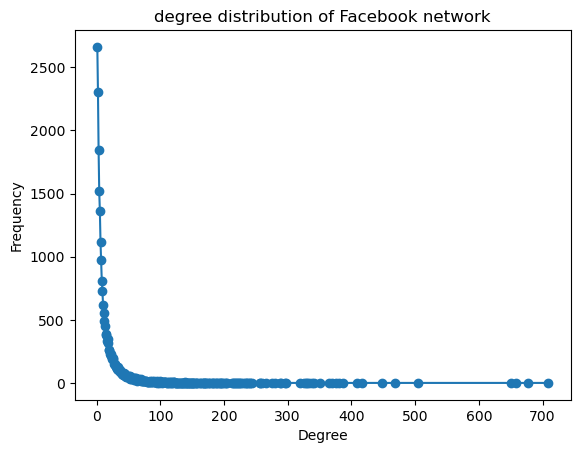

In [6]:
fig, axes = plt.subplots()

plt.plot(degree, frequence, 'o-')
plt.xlabel('Degree')
plt.ylabel('Frequency')

plt.title('degree distribution of Facebook network')
plt.show()

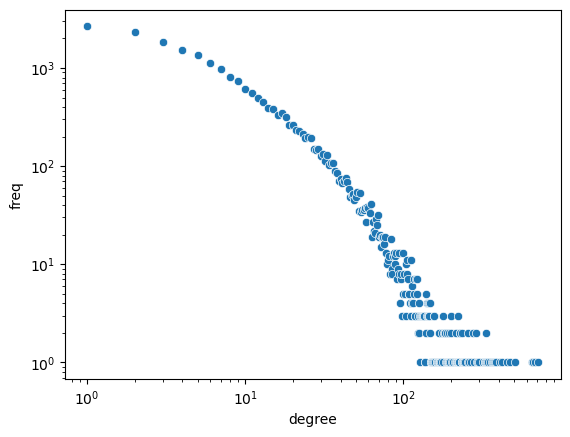

In [7]:
# 双对数坐标曲线下的度分布
fig, ax = plt.subplots()
ax.set(xscale="log", yscale="log")
g = sns.scatterplot(x='degree', y='freq', data=df_degree)
plt.show()

### 集聚系数 clustering coefficient

你的朋友之间互相认识的概率，比如，你朋友圈里两个好朋友的互相评论。

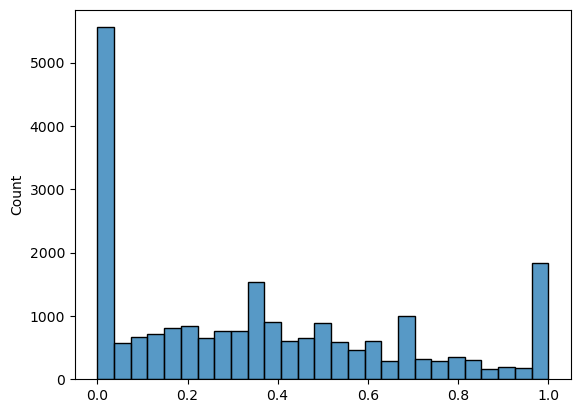

In [29]:
fig, ax = plt.subplots()
sns.histplot(nx.clustering(G_facebook))
plt.show()

### 连通性

**网络是否连通？**

In [30]:
print(nx.is_connected(G_facebook))

False


**最大连通集团**  Giant connected components, GCC

In [31]:
largest_cc = max(nx.connected_components(G_facebook), key=len)
Gcc_facebook = G_facebook.subgraph(largest_cc)

### 寻找度大节点

In [32]:
highest_degree_node = max(Gcc_facebook.nodes, key=Gcc_facebook.degree)
print('node \'%s\' has largest degree with %d' % (highest_degree_node, Gcc_facebook.degree(highest_degree_node)))

node '16895' has largest degree with 709


### 同配性 Assortative

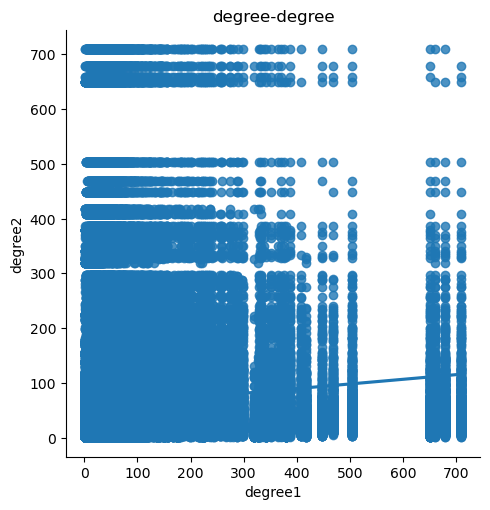

In [33]:
degree1 = []
degree2 = []

for v in Gcc_facebook:  
    for neighbor in Gcc_facebook.neighbors(v):
        degree1.append(Gcc_facebook.degree(v))
        degree2.append(Gcc_facebook.degree(neighbor))

data = pd.DataFrame({'degree1': degree1, 
                     'degree2': degree2})

g = sns.lmplot(x='degree1', y='degree2', data=data)

plt.title('degree-degree')
plt.show()

**同配性系数 Assortative**

In [34]:
nx.degree_assortativity_coefficient(Gcc_facebook)

0.08505802105736311